In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [2]:
from proj1_helpers import *
from costs import *
from lab_helpers import *
from plots_lab4 import *
from my_helpers import *
import pandas as pd
import matplotlib.pyplot as plt

## To Do Graphs
- PCA Decomposition + Classification
- Correlation
- Changing loss for different algorithms
- ???

## To Do tasks
- Manuel: implement K-fold to choose degree, change split data , ?
- Gabbo: ?
- Marco: ?

## Load the training data into feature matrix, class labels, and event ids:

In [3]:
DATA_TRAIN_PATH = '../data/train.csv'
y_or, tX_or, ids = load_csv_data(DATA_TRAIN_PATH)

In [4]:
y = y_or
tX = tX_or

## Data preprocessing

In [5]:
tX_pd = pd.read_csv('../data/train.csv')
tX_pd.drop(labels=['Id', 'Prediction'], axis=1, inplace=True)
tX_pd.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,...,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497
1,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,...,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226
2,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,...,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251
3,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,75.968,...,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000
4,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,...,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000


In [6]:
i=0
for c in tX_pd.columns:
    print(i, c)
    i+=1

0 DER_mass_MMC
1 DER_mass_transverse_met_lep
2 DER_mass_vis
3 DER_pt_h
4 DER_deltaeta_jet_jet
5 DER_mass_jet_jet
6 DER_prodeta_jet_jet
7 DER_deltar_tau_lep
8 DER_pt_tot
9 DER_sum_pt
10 DER_pt_ratio_lep_tau
11 DER_met_phi_centrality
12 DER_lep_eta_centrality
13 PRI_tau_pt
14 PRI_tau_eta
15 PRI_tau_phi
16 PRI_lep_pt
17 PRI_lep_eta
18 PRI_lep_phi
19 PRI_met
20 PRI_met_phi
21 PRI_met_sumet
22 PRI_jet_num
23 PRI_jet_leading_pt
24 PRI_jet_leading_eta
25 PRI_jet_leading_phi
26 PRI_jet_subleading_pt
27 PRI_jet_subleading_eta
28 PRI_jet_subleading_phi
29 PRI_jet_all_pt


### Correlation graph needed

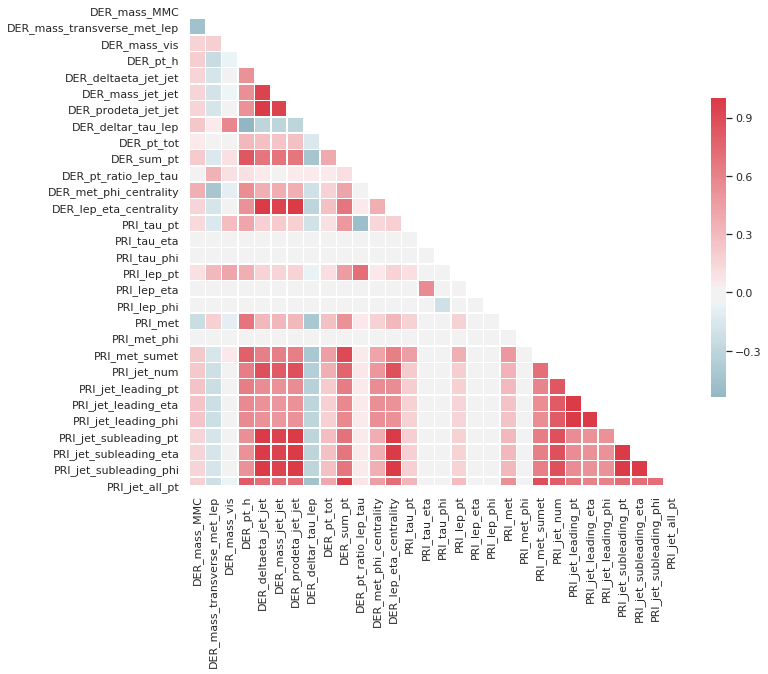

In [7]:
import seaborn as sns
sns.set(style="white")

d = tX_pd
# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 11))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [8]:
tX_pd=pd.DataFrame(tX)

In [9]:
for i in range(0,30):
    s = tX_pd[tX_pd[i]==-999].index.size
    if s > 900:
        print(i, s)

0 38114
4 177457
5 177457
6 177457
12 177457
23 99913
24 99913
25 99913
26 177457
27 177457
28 177457


Funzione di Marco per cancellare tutto con numpy e mettere la media: da scrivere e usare al posto di pandas alla fine

In [10]:
# uno = np.where(tX==-999,1,0)
# s = np.sum(uno,axis=0)
# index = np.argwhere(s > 100000)
# new = np.delete(tX,index[1:],axis=1)
# uno = np.where(new==-999,1,0)
# s = np.sum(uno,axis=0)
# index = np.argwhere((s>40000)&(s < 100000))
# new = np.delete(new,index[1:],axis=1)
# uno = np.where(new==-999,1,0)
# s = np.sum(uno,axis=0)
# index = np.argwhere((s<40000)&(s>1))
# prima = new[:,index]
# index_ = np.argwhere(prima==-999)
# prima_new = np.delete(prima, index_)
# media = np.median(prima_new)
# prima[prima==-999] = media
# new[:,index] = prima

# uno = np.where(new==-999,1,0)
# s = np.sum(uno,axis=0)
# index = np.argwhere((s>40000)&(s < 100000))
# prima = new[:,index]
# index_ = np.argwhere(prima==-999)
# prima_new = np.delete(prima, index_)
# media = np.median(prima_new)
# prima[prima==-999] = media
# new[:,index] = prima

# uno = np.where(new==-999,1,0)
# s = np.sum(uno,axis=0)
# index = np.argwhere(s > 100000)
# prima = new[:,index]
# index_ = np.argwhere(prima==-999)
# prima_new = np.delete(prima, index_)
# media = np.median(prima_new)
# prima[prima==-999] = media
# new[:,index] = prima

Drop PRI with a lot of null + 29 (29 is a Pri corr with 9)

In [11]:
drops = [5,6,12,24,25,26,27,28,29] #our

In [12]:
drops = [12, 5, 6, 29, 24, 25, 27, 28, 26, 21] #kaggle

In [13]:
tX_pd.drop(drops, axis=1, inplace=True)

In [14]:
#replace with median
tX_pd.where(tX_pd!=-999, inplace=True)
tX_pd.fillna(tX_pd.mean(), inplace=True)

In [15]:
tX = tX_pd.values

Normalize Data

In [16]:
tX, mean_x, std_x = standardize(tX)

Split Data

In [17]:
x_tr, x_te, y_tr, y_te = split_data(y,tX,0.75,1)

In [18]:
def cross_validation(y, x, k_indices, k, lambda_, degree, mean=True):
    """return the loss of ridge regression."""
    losses_tr = []
    losses_te = []
    
    # get k'th subgroup in test, others in train: TODO
    for k_group in range(k):
        index_te = k_indices[k_group]
        index_tr = np.setdiff1d(np.arange(len(y)), index_te)
        x_te = x[index_te]
        x_tr = x[index_tr]
        y_te = y[index_te]
        y_tr = y[index_tr]
        
        # form data with polynomial degree
        x_te_poly = build_poly(x_te, degree)
        x_tr_poly = build_poly(x_tr, degree)
   
        w = ridge_regression(y_tr, x_tr_poly, lambda_)
        #w = least_squares(y_tr, x_tr_poly)
    
        # calculate the loss for train and test data
        rmse_tr = compute_rmse(y_tr, x_tr_poly, w)
        rmse_te = compute_rmse(y_te, x_te_poly, w)
        losses_tr.append(rmse_tr)
        losses_te.append(rmse_te)

    if mean==True:
        loss_tr = np.mean(losses_tr)
        loss_te = np.mean(losses_te)
    else:
        loss_tr = losses_tr
        loss_te = losses_te
    return loss_tr, loss_te

In [ ]:
def cross_validation_demo():
    degree = 7
    k_fold = 4
    lambdas = np.logspace(-5, 1, 50)
    for d in range (1, degree+1):
        for i in range (0, 3):
            seed = i
            # split data in k fold
            y_sub, x_sub = get_subsample(y_tr, x_tr, 10000, seed)
            k_indices = build_k_indices(y_sub, k_fold, seed)
            # define lists to store the loss of training data and test data
            rmse_tr = []
            rmse_te = []
            for lambda_ in lambdas:
                loss_tr, loss_te = cross_validation(y_sub, x_sub, k_indices, k_fold, lambda_, d)
                rmse_tr.append(loss_tr)
                rmse_te.append(loss_te)
        cross_validation_visualization(lambdas, rmse_tr, rmse_te, d)

cross_validation_demo()

In [20]:
def select_best_degree(y, x, max_degree, k_fold, seed=1):
    y_sub, x_sub = get_subsample(y, x, 50000, seed)
    lambdas = np.logspace(-5, 1, 50)
    k_indices = build_k_indices(y_sub, k_fold, seed)
    loss_min = np.inf
    degree_star = 0
    lambda_star = 0
    for degree in range(1, max_degree+1):
        rmse_te = []
        for lambda_ in lambdas:
            loss_tr, loss_te = cross_validation(y_sub, x_sub, k_indices, k_fold, lambda_, degree)
            #print(degree, lambda_, loss_te)
            if loss_te < loss_min:
                loss_min = loss_te
                degree_star = degree
                lambda_star = lambda_
    return degree_star, lambda_star

In [48]:
max_degree = 10
k_fold = 4
degree_star, lambda_star = select_best_degree(y, tX, max_degree, k_fold, 264)
print("Best degree: {} with lambda = {}".format(degree_star, lambda_star))

KeyboardInterrupt: 

In [22]:
def select_best_degree_ls(y, x, max_degree, k_fold, seed=1):
    y_sub, x_sub = get_subsample(y, x, 50000, seed)
    k_indices = build_k_indices(y_sub, k_fold, seed)
    loss_min = np.inf
    degree_star = 0
    lambda_star = 0
    for degree in range(1, max_degree+1):
        rmse_te = []
        loss_tr, loss_te = cross_validation(y_sub, x_sub, k_indices, k_fold, 0, degree)
        #print(degree, lambda_, loss_te)
        if loss_te < loss_min:
            loss_min = loss_te
            degree_star = degree
    return degree_star

In [47]:
max_degree = 10
k_fold = 4
degree_star_ls = select_best_degree_ls(y, tX, max_degree, k_fold, 264)
print("Best degree for least squares: {}".format(degree_star))

LinAlgError: Singular matrix

## Start working

In [24]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    w = initial_w
    loss = np.inf
    for n_iter in range(max_iters):
        g = compute_gradient(y, tx, w)
        new_w = w - gamma*g;
        new_loss = compute_loss(y, tx, new_w)
        # print TO DELETE IN FINAL VERSION
        if new_loss <= loss:
            loss, w = new_loss, new_w
            gamma *=1.8 #accelerate algorithm learning rate
            #print("Gradient Descent({bi}/{ti}): loss={l} ; gamma={g}; gamma aumenta".format(
             # bi=n_iter, ti=max_iters - 1, l=loss, g= gamma))
        else:
            gamma *=0.3 #decelerate to avoid exponential growing
            #print("Gradient Descent({bi}/{ti}): loss={l} ; gamma={g}; gamma diminuisce".format(
             # bi=n_iter, ti=max_iters - 1, l=loss, g= gamma)
        print("Gradient Descent({bi}/{ti}): ||gradient||={grad}, loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, grad=np.linalg.norm(g), l=loss, w0=w[0], w1=w[1]))

    return w, loss

In [25]:
# Define the parameters of the algorithm.
max_iters = 200
gamma = 0.0001

# Initialization
w_initial = np.zeros(tX.shape[1])

# Start gradient descent.
gradient_w, gradient_loss = gradient_descent(y, tX, w_initial, max_iters, gamma)

Gradient Descent(0/199): ||gradient||=0.9514674695052744, loss=0.49990952187801607, w0=-4.566083683983554e-05, w1=-2.7673110315300844e-05
Gradient Descent(1/199): ||gradient||=0.9503974349746639, loss=0.4997471004168022, w0=-0.00012775891568991358, w1=-7.74697663456779e-05
Gradient Descent(2/199): ||gradient||=0.9484748856073144, loss=0.4994561587587336, w0=-0.0002752396309919623, w1=-0.0001670553859616563
Gradient Descent(3/199): ||gradient||=0.945025663562588, loss=0.49893702053457856, w0=-0.0005397487600344354, w1=-0.00032815311708093433
Gradient Descent(4/199): ||gradient||=0.9388538071579059, loss=0.4980171379394563, w0=-0.0010127807321615439, w1=-0.0006176241296845474
Gradient Descent(5/199): ||gradient||=0.9278630171844047, loss=0.4964074108357241, w0=-0.0018543229526410121, w1=-0.001137046406747271
Gradient Descent(6/199): ||gradient||=0.9084608081976439, loss=0.4936527396135756, w0=-0.0033374261678922124, w1=-0.0020667995528072494
Gradient Descent(7/199): ||gradient||=0.874755

In [26]:
def stochastic_gradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent algorithm."""
    w = initial_w
    loss = np.inf
    for n_iter in range(max_iters):
        for yn, xn in batch_iter(y, tx, batch_size):
            g = compute_stoch_gradient(yn, xn, w)
            new_w = w - gamma*g;
            new_loss = compute_loss(y, tx, new_w)
        if new_loss <= loss:
            loss , w = new_loss , new_w
            gamma *=1.8
            #print("SGD({bi}/{ti}): loss={l} ; gamma={g}; gamma aumenta".format(
             # bi=n_iter, ti=max_iters - 1, l=loss, g= gamma))
        else:
            gamma *=0.3
            #print("SGD({bi}/{ti}): loss={l} ; gamma={g}; gamma diminuisce".format(
             #     bi=n_iter, ti=max_iters - 1, l=loss, g= gamma))
        print("SGD({bi}/{ti}): |gradient|={grad}, loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, grad=np.linalg.norm(g), l=loss, w0=w[0], w1=w[1]))

    return w, loss

In [27]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 100
gamma = 0.01
batch_size = 1

# Initialization
w_initial = np.zeros(tX.shape[1])

# Start SGD.
sgd_loss, sgd_w = stochastic_gradient_descent(
    y, tX, w_initial, batch_size, max_iters, gamma)


SGD(0/99): |gradient|=2.8600930823379542, loss=0.4793815082710041, w0=-0.014810381885254457, w1=-0.008667330987376116
SGD(1/99): |gradient|=2.7173770572759213, loss=0.4551646841849014, w0=-0.03931171197803044, w1=-0.025069533181488846
SGD(2/99): |gradient|=2.663364057997503, loss=0.4551646841849014, w0=-0.03931171197803044, w1=-0.025069533181488846
SGD(3/99): |gradient|=4.901321643170403, loss=0.4551646841849014, w0=-0.03931171197803044, w1=-0.025069533181488846
SGD(4/99): |gradient|=11.275304404310342, loss=0.4551646841849014, w0=-0.03931171197803044, w1=-0.025069533181488846
SGD(5/99): |gradient|=2.311745732381912, loss=0.4547619394775679, w0=-0.04036049208244068, w1=-0.02499185578064573
SGD(6/99): |gradient|=4.798999181069181, loss=0.4547619394775679, w0=-0.04036049208244068, w1=-0.02499185578064573
SGD(7/99): |gradient|=2.6065640647509216, loss=0.45448994375843865, w0=-0.04099102291497729, w1=-0.02529055382235474
SGD(8/99): |gradient|=2.5234302663767862, loss=0.45395909933340484, w

In [36]:
def least_squares(y, tx):
    """calculate the least squares solution."""
    D = tx.shape[1]
    G = tx.T.dot(tx)
    if(np.linalg.matrix_rank(G)==D):
        w = np.linalg.inv(G).dot(tx.T).dot(y)
    else:
        w = np.linalg.lstsq(G,tx.T.dot(y), rcond=None) [0]
    return w

In [37]:
w_ls = least_squares(y, tX)
loss = compute_loss(y, tX, w_ls)
loss

0.34673788750013346

In [38]:
def ridge_regression(y, tx, lambda_):
    """implement ridge regression."""
    N = len(y)
    G = tx.T.dot(tx)
    i = np.linalg.inv(G + 2*N*lambda_*np.eye(G.shape[0]))
    w_star = i.dot(tx.T).dot(y)
    return w_star

In [39]:
a = np.array([[2,2], [3,3]])
build_poly(a,7).shape

(2, 16)

In [40]:
x_tr_poly = build_poly(x_tr, 8)
x_te_poly = build_poly(x_te, 8)
lambda_ = 0.001
w = ridge_regression(y_tr, x_tr_poly, lambda_)
loss_tr = compute_loss(y_tr, x_tr_poly, w)
loss_te = compute_loss(y_te, x_te_poly, w)
rmse_te = compute_rmse(y_te, x_te_poly, w)
rmse_tr = compute_rmse(y_tr, x_tr_poly, w)
print(loss_tr, loss_te, rmse_tr, rmse_te)

1.7533916560805558 1.7688746898354883 1.872640732271172 1.8808905815254051


In [33]:
lambda_ = 0.001
w = ridge_regression(y_tr, x_tr, lambda_)
loss_tr = compute_loss(y_tr, x_tr, w)
loss_te = compute_loss(y_te, x_te, w)
rmse_te = compute_rmse(y_te, x_te, w)
rmse_tr = compute_rmse(y_tr, x_tr, w)
print(loss_tr, loss_te, rmse_tr, rmse_te)

0.36996642100963134 0.3696055205324451 0.860193491035164 0.859773831344552


In [34]:
from sklearn.linear_model import Ridge
r = Ridge(alpha=0.01, fit_intercept=False, normalize=False, solver='lsqr')
r.fit(x_tr, y_tr)
w_skt = r.coef_
print(compute_loss(y_te, x_te, w_skt))

0.37227827082132925


In [35]:
print(w_skt, w)

[ 0.06507804 -0.60690804 -0.12793408 -0.03411475  0.13656939  0.06606513
 -0.09863531 -0.00412276 -0.01418446  0.09789098  0.52011973  0.00901738
  0.00307711  0.28443773  0.00899178  0.01477813  0.18105867  0.01198255
  0.00826558 -0.09369979] [ 5.79498990e-02 -5.82400017e-01 -1.16000064e-01 -2.32941947e-02
  8.72162468e-01  3.44681596e-01 -1.02937017e-01  7.58811118e-04
 -4.01373176e-01  5.77495535e-01  4.92124527e-01 -1.72135379e-01
 -2.02059144e-01  2.57321902e-01 -1.69313999e-01 -1.33408031e-01
  1.68988670e-01 -1.35576843e-01 -1.77852836e-01 -9.76418852e-02]


#### Logistic Regression

In [ ]:
def sigmoid(t):
    """apply sigmoid function on t."""
    expt = np.exp(t)
    sigm = expt/(1+expt)
    return sigm

In [49]:
def calculate_loss(y, tx, w):
    """compute the cost by negative log likelihood."""
    first = np.sum(np.log(1+np.exp(tx.dot(w))))
    second = y.T.dot(tx.dot(w))
    return first - second

In [50]:
def calculate_gradient(y, tx, w):
    """compute the gradient of loss."""
    return tx.T.dot(sigmoid(tx.dot(w))-y)

In [51]:
w = np.zeros((tx_te.shape[1], 1))
calculate_gradient(y_te, tx_te, w)

NameError: name 'tx_te' is not defined

#### Using Gradient Descent
Implement your function to calculate the gradient for logistic regression.

In [44]:
def learning_by_gradient_descent(y, tx, w, gamma):
    """
    Do one step of gradient descent using logistic regression.
    Return the loss and the updated w.
    """
    loss = calculate_loss(y, tx, w)
    grad = calculate_gradient(y, tx, w)
    w = w - gamma * grad
    return loss, w

Demo!

In [46]:
def logistic_regression_gradient_descent(y, x):
    # init parameters
    max_iter = 10000
    threshold = 1e-8
    gamma = 0.01
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_gradient_descent(y, tx, w, gamma)
        # log info
        if iter % 100 == 0:
            print("Current iteration={i}, loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    print("loss={l}".format(l=calculate_loss(y, tx, w)))

logistic_regression_gradient_descent(y_tr, x_tr)

MemoryError: Unable to allocate array with shape (187500, 187500) and data type float64

Calculate your hessian below

In [16]:
def calculate_hessian(y, tx, w):
    """return the hessian of the loss function."""
    N = tx.shape[0]
    S = np.zeros((N,N))
    for i in range(N):
        sigma = sigmoid(tx[i,:].T.dot(w))
        S[i,i] = sigma*(1-sigma)
    return tx.T.dot(S).dot(tx)

Write a function below to return loss, gradient, and hessian.

In [17]:
def logistic_regression(y, tx, w):
    """return the loss, gradient, and hessian."""
    return calculate_loss(y, tx, w), calculate_gradient(y, tx, w), calculate_hessian(y, tx, w)

### Using Newton's method
Use Newton's method for logistic regression.

In [18]:
def learning_by_newton_method(y, tx, w):
    """
    Do one step on Newton's method.
    return the loss and updated w.
    """
    # mettiamo il gamma???????
    gamma = 0.1
    loss, gradient, hessian = logistic_regression(y, tx, w)
    w = w - gamma * np.linalg.inv(hessian).dot(gradient)
    return loss, w

demo

Current iteration=0, the loss=[[138.62943611]]
Current iteration=1, the loss=[[126.31098317]]
Current iteration=2, the loss=[[116.17884132]]
Current iteration=3, the loss=[[107.6360377]]
Current iteration=4, the loss=[[100.30205497]]
Current iteration=5, the loss=[[93.92045949]]
Current iteration=6, the loss=[[88.31062659]]
Current iteration=7, the loss=[[83.34061998]]
Current iteration=8, the loss=[[78.91107491]]
Current iteration=9, the loss=[[74.94517505]]
Current iteration=10, the loss=[[71.38217682]]
Current iteration=11, the loss=[[68.17308538]]
Current iteration=12, the loss=[[65.27768185]]
Current iteration=13, the loss=[[62.66242564]]
Current iteration=14, the loss=[[60.29893947]]
Current iteration=15, the loss=[[58.16289282]]
Current iteration=16, the loss=[[56.23316457]]
Current iteration=17, the loss=[[54.49120613]]
Current iteration=18, the loss=[[52.92055178]]
Current iteration=19, the loss=[[51.50643913]]
Current iteration=20, the loss=[[50.23551383]]
Current iteration=2

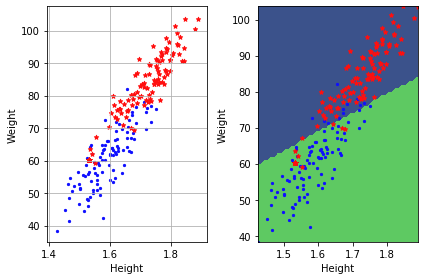

In [19]:
def logistic_regression_newton_method_demo(y, x):
    # init parameters
    max_iter = 100
    threshold = 1e-8
    lambda_ = 0.1
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_newton_method(y, tx, w)
        # log info
        if iter % 1 == 0:
            print("Current iteration={i}, the loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_newton_method")
    print("loss={l}".format(l=calculate_loss(y, tx, w)))

logistic_regression_newton_method_demo(y, x)

### Using penalized logistic regression
Fill in the function below.

In [38]:
def penalized_logistic_regression(y, tx, w, lambda_):
    """return the loss, gradient, and hessian."""
    N = tx.shape[0]
    D = tx.shape[1]
    loss = calculate_loss(y, tx, w) + lambda_ / 2 * np.linalg.norm(w)
    gradient = calculate_gradient(y, tx, w) + lambda_ * w
    hessian = calculate_hessian(y, tx, w) + N * np.identity(D)
    return loss, gradient, hessian

In [39]:
def learning_by_penalized_gradient(y, tx, w, gamma, lambda_):
    """
    Do one step of gradient descent, using the penalized logistic regression.
    Return the loss and updated w.
    """
    loss, gradient, hessian = penalized_logistic_regression(y, tx, w, lambda_)
    w = w - gamma * gradient
    return loss, w

Current iteration=0, loss=[[138.62943611]]
Current iteration=100, loss=[[44.05317937]]
Current iteration=200, loss=[[42.25140875]]
Current iteration=300, loss=[[41.80558261]]
Current iteration=400, loss=[[41.6525147]]
Current iteration=500, loss=[[41.59047409]]
Current iteration=600, loss=[[41.5630489]]
Current iteration=700, loss=[[41.55037695]]
Current iteration=800, loss=[[41.54439137]]
Current iteration=900, loss=[[41.54153339]]
Current iteration=1000, loss=[[41.54016158]]
Current iteration=1100, loss=[[41.53950145]]
Current iteration=1200, loss=[[41.53918339]]
Current iteration=1300, loss=[[41.53903005]]
Current iteration=1400, loss=[[41.53895611]]
Current iteration=1500, loss=[[41.53892045]]
Current iteration=1600, loss=[[41.53890325]]
Current iteration=1700, loss=[[41.53889495]]
Current iteration=1800, loss=[[41.53889095]]
Current iteration=1900, loss=[[41.53888902]]
loss=[[41.22247126]]


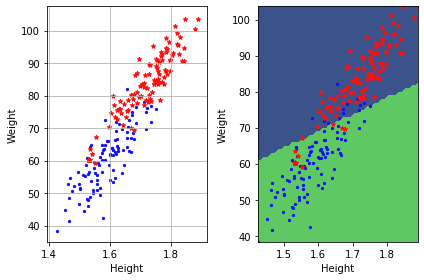

In [41]:
def logistic_regression_penalized_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 10000
    gamma = 0.01
    lambda_ = 0.1
    threshold = 1e-8
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_penalized_gradient(y, tx, w, gamma, lambda_)
        # log info
        if iter % 100 == 0:
            print("Current iteration={i}, loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_penalized_gradient_descent")
    print("loss={l}".format(l=calculate_loss(y, tx, w)))
    
logistic_regression_penalized_gradient_descent_demo(y, x)

## Generate predictions and save ouput in csv format for submission:

#### Use Accuracy and F1 Score on our classification:

In [ ]:
from sklearn.metrics import f1_score, accuracy_score

In [ ]:
y_pred_test = predict_labels(w_ls, x_te)
acc = accuracy_score(y_te, y_pred_test)
f1 = f1_score(y_te, y_pred_test)
print(acc, f1)

In [ ]:
DATA_TEST_PATH = '../data/test.csv'
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [ ]:
OUTPUT_PATH = '../data/submission.csv'
tX_test_s, mean_tes, std_test = standardize(tX_test)
y_pred = predict_labels(w, tX_test_s)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

In [ ]:
#we will need something like this

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(tX_test_s)
plt.scatter(principalComponents[:,0], principalComponents[:,1])